Welcome to the Enhanced Carbon Footprint Application!

Menu:
1. Calculate Carbon Footprint
2. View Saved Data (Sorted by Total Footprint)
3. Exit



--- Sorted Carbon Footprint Data (Ascending Order by Total) ---
+----------------+------------------------+--------------------+------------------+------------------+----------------------------+
| Company Name   |   Electricity (kg CO2) |   Vehicle (kg CO2) |   Waste (kg CO2) |   Water (kg CO2) |   Total Footprint (kg CO2) |
+================+========================+====================+==================+==================+============================+
| aldi           |                  21.16 |               4.83 |              4.5 |           0.0015 |                    30.4915 |
+----------------+------------------------+--------------------+------------------+------------------+----------------------------+
| natto          |                  31.28 |               4.83 |              1.2 |           0.051  |                    37.361  |
+----------------+------------------------+--------------------+------------------+------------------+----------------------------+
| saeed ahm

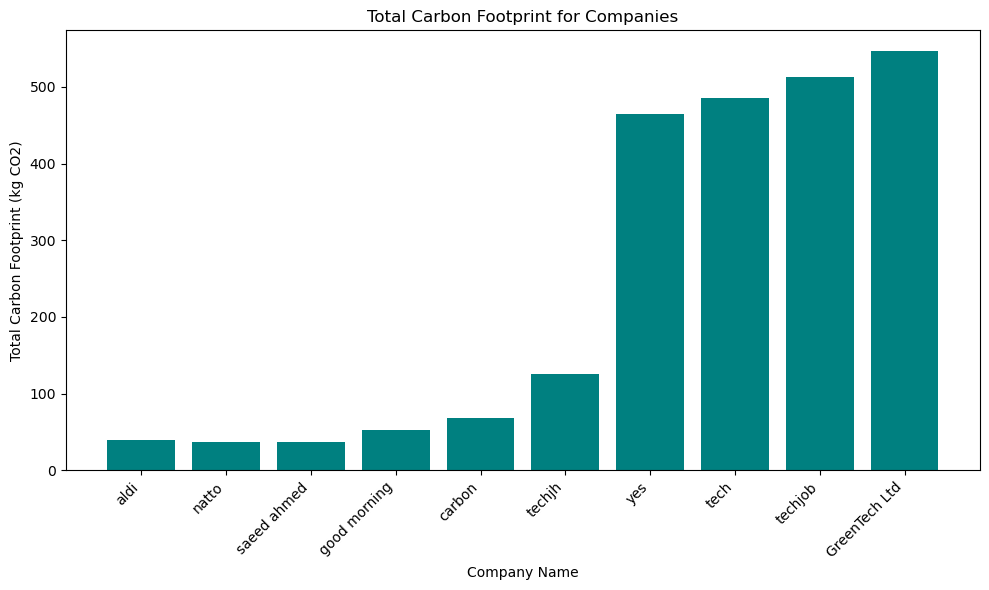


Menu:
1. Calculate Carbon Footprint
2. View Saved Data (Sorted by Total Footprint)
3. Exit

--- Carbon Footprint Report ---
Company Name: bio
Electricity: 368.00 kg CO2
Vehicle: 630.00 kg CO2
Waste: 20.00 kg CO2
Water: 0.15 kg CO2
Total Carbon Footprint: 1018.15 kg CO2

Data saved successfully!


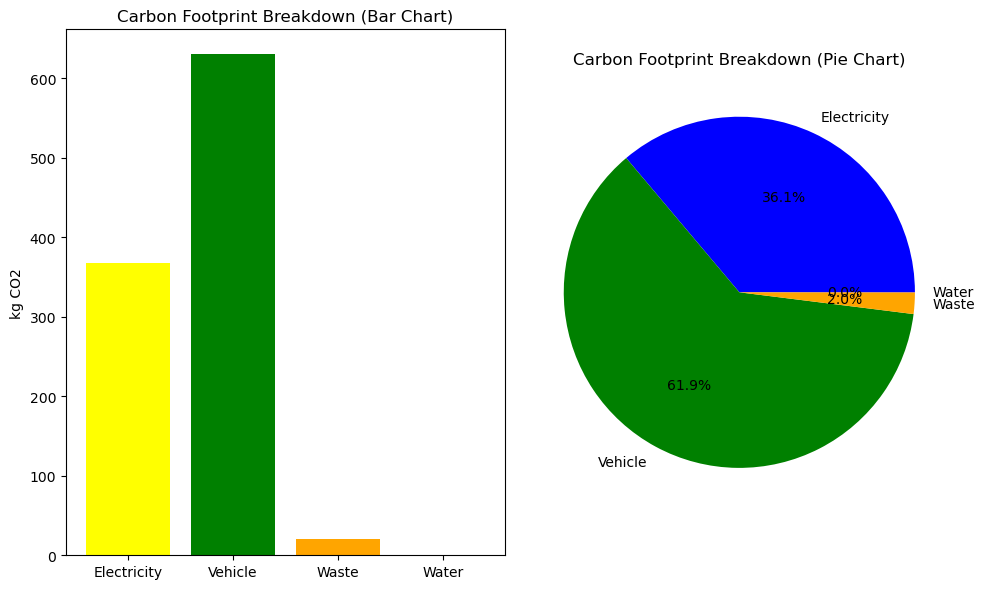


Menu:
1. Calculate Carbon Footprint
2. View Saved Data (Sorted by Total Footprint)
3. Exit
Exiting the application. Goodbye!


In [3]:
import matplotlib.pyplot as plt
import csv
import os
from tabulate import tabulate  # For displaying data in a table format

# Constants for carbon footprint
ELectric_emission = 0.92    # kg CO2 per kWh
Vehicle_emission = 0.21     # kg CO2 per mile
Waste_emission = 0.1        # kg CO2 per kg of waste
Water_emission = 0.0015     # kg CO2 per liter

# File to save data
DATA_FILE = "carbon_footprint_data.csv"


# Method to calculate carbon footprint
def calculate_fprint(electricity_cal, vehicle_cal, waste_cal, water_cal):
    electric_fprint_cal = electricity_cal * ELectric_emission
    vehicle_fprint_cal = vehicle_cal * Vehicle_emission
    waste_fprint_cal = waste_cal * Waste_emission
    water_fprint_cal = water_cal * Water_emission
    
    total_footprint = electric_fprint_cal + vehicle_fprint_cal + waste_fprint_cal + water_fprint_cal
    return electric_fprint_cal, vehicle_fprint_cal, waste_fprint_cal, water_fprint_cal, total_footprint



# Method to reduce carbon footprint
def generate_suggestions(electric_red, vehicle_red, waste_red, water_red):
    suggestions = []
    if electric_red > 500:
        suggestions.append("Reduce electricity usage by switching to LED lights or renewable energy sources.")
    if vehicle_red > 300:
        suggestions.append("Consider carpooling or using public transportation to reduce vehicle emissions.")
    if waste_red > 50:
        suggestions.append("Recycle more to reduce waste emissions.")
    if water_red > 1000:
        suggestions.append("Conserve water by fixing leaks and using efficient appliances.")
    return suggestions


# Method to analyze carbon footprint with graphs
def visualize_footprint(electric_analysis, vehicle_analysis, waste_analysis, water_analysis):
    categories = ['Electricity', 'Vehicle', 'Waste', 'Water']
    values = [electric_analysis, vehicle_analysis, waste_analysis, water_analysis]

    plt.figure(figsize=(10, 6))

    # Bar Chart
    plt.subplot(1, 2, 1)
    plt.bar(categories, values, color=['yellow', 'green', 'orange', 'purple'])
    plt.title("Carbon Footprint Breakdown (Bar Chart)")
    plt.ylabel("kg CO2")

    # Pie Chart
    plt.subplot(1, 2, 2)
    plt.pie(values, labels=categories, autopct='%1.1f%%', colors=['red', 'green', 'orange', 'purple'])
    plt.title("Carbon Footprint Breakdown (Pie Chart)")

    plt.tight_layout()
    plt.show()

# Method to save data to a CSV file
def save_data(company_name, elec_fp, veh_fp, waste_fp, water_fp, total_fp):
    file_exists = os.path.isfile(DATA_FILE)
    with open(DATA_FILE, mode="a", newline="") as file:
        writer = csv.writer(file)
        if not file_exists:
            writer.writerow(["Company Name", "Electricity (kg CO2)", "Vehicle (kg CO2)", "Waste (kg CO2)", "Water (kg CO2)", "Total (kg CO2)"])
        writer.writerow([company_name, elec_fp, veh_fp, waste_fp, water_fp, total_fp])
    print("\nData saved successfully!")


# Method to display saved data sorted by total footprint
def display_saved_data_sorted():
    if not os.path.isfile(DATA_FILE):
        print("No data found.")
        return

    with open(DATA_FILE, mode="r") as file:
        reader = csv.reader(file)
        data = list(reader)

        if len(data) > 1:
            header = data[0]
            rows = data[1:]

            # Sort rows by the last column (Total Footprint)
            rows = [row for row in rows if row[-1].strip() and row[-1].replace('.', '', 1).isdigit()]
            rows = sorted(rows, key=lambda x: float(x[-1]))

            print("\n--- Sorted Carbon Footprint Data (Ascending Order by Total) ---")
            print(tabulate(rows, headers=header, tablefmt="grid"))
            
            # Visualize total footprint values
            visualize_total_footprints(rows)
        else:
            print("No data available to display.")
    input("\nPress Enter to return to the main menu...")

# Method to visualize total footprint values as a bar chart
def visualize_total_footprints(data):
    company_names = [row[0] for row in data]
    total_values = [float(row[-1]) for row in data]

    plt.figure(figsize=(10, 6))
    plt.bar(company_names, total_values, color='teal')
    plt.title("Total Carbon Footprint for Companies")
    plt.xlabel("Company Name")
    plt.ylabel("Total Carbon Footprint (kg CO2)")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


# Main program
def main():
    print("Welcome to the Enhanced Carbon Footprint Application!")
    
    while True:
        print("\nMenu:")
        print("1. Calculate Carbon Footprint")
        print("2. View Saved Data (Sorted by Total Footprint)")
        print("3. Exit")

        choice = input("Enter your choice (1/2/3): ")

        if choice == "1":
            # Collect user data
            company_name = input("Enter Company Name: ")
            electricity = float(input("Enter your monthly electricity usage (kWh): "))
            vehicle = float(input("Enter your monthly vehicle usage (miles): "))
            waste = float(input("Enter your monthly waste generated (kg): "))
            water = float(input("Enter your monthly water consumption (liters): "))

            # Calculate footprint
            elec_fp, veh_fp, waste_fp, water_fp, total_fp = calculate_fprint(electricity, vehicle, waste, water)

            # Display results
            print("\n--- Carbon Footprint Report ---")
            print(f"Company Name: {company_name}")
            print(f"Electricity: {elec_fp:.2f} kg CO2")
            print(f"Vehicle: {veh_fp:.2f} kg CO2")
            print(f"Waste: {waste_fp:.2f} kg CO2")
            print(f"Water: {water_fp:.2f} kg CO2")
            print(f"Total Carbon Footprint: {total_fp:.2f} kg CO2")

            # Save data
            save_data(company_name, elec_fp, veh_fp, waste_fp, water_fp, total_fp)

            # Visualize footprint
            visualize_footprint(elec_fp, veh_fp, waste_fp, water_fp)

        elif choice == "2":
            display_saved_data_sorted()

        elif choice == "3":
            print("Exiting the application. Goodbye!")
            break

        else:
            print("Invalid choice. Please try again.")

if __name__ == "__main__":
    main()
